# classification.cnn

> Fill in a module description here

In [ ]:
from monitosed.classification.core import *
from monitosed.data.core import *
from monitosed.models import *

from fastcore.xtras import Path
from tsai.all import *

%load_ext autoreload
%autoreload 2

In [ ]:
users, labels = get_users_labels('../_data/Smarthy2_Behavioral.xlsx', drop_ixs=[0,2,7, 12, 13, 16])

In [ ]:
path = Path("../_data/foot1/Rest"); path.ls()

(#14) [Path('../_data/foot1/Rest/VR23_RestStim_data_clean.mat'),Path('../_data/foot1/Rest/VR20_Reststim_data_clean.mat'),Path('../_data/foot1/Rest/VR26_Reststim_data_clean.mat'),Path('../_data/foot1/Rest/VR31_Reststim_data_clean.mat'),Path('../_data/foot1/Rest/VR27_Reststim_data_clean.mat'),Path('../_data/foot1/Rest/VR40_RestStim_data_clean.mat'),Path('../_data/foot1/Rest/VR51_RestStim_data_clean.mat'),Path('../_data/foot1/Rest/VR41_RestStim_data_clean.mat'),Path('../_data/foot1/Rest/VR38_RestStim_data_clean.mat'),Path('../_data/foot1/Rest/VR35_RestStim_data_clean.mat')...]

In [ ]:
mats = load_mats(path, 2)

  0%|          | 0/2 [00:00<?, ?it/s]

Loading: VR20_Reststim_data_clean.mat
Loading: VR23_RestStim_data_clean.mat


In [ ]:
#Optional
signal_len = 1500

In [ ]:
x = prepare_train_data(mats)

In [ ]:
x.shape

(112, 173, 1500)

In [ ]:
read_mats = [read_data(mat) for mat in mats]

In [ ]:
y = np.concatenate([np.repeat(labels.values[i], read_mats[i].shape[0]) for i in range(len(mats))])

In [ ]:
train_ix = int((1-0.2)*len(x))

In [ ]:
splits = (np.arange(0, train_ix), np.arange(train_ix, x.shape[0]))

In [ ]:
tfms  = [None, [TSRegression()]]
batch_tfms = TSStandardize(by_sample=True, by_var=True)
#dls = get_ts_dls(x, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=128)
dls = get_ts_dls(x, y, splits=splits, tfms=tfms, bs=128)

In [ ]:
xb,yb = dls.one_batch(); xb,yb

(TSTensor(samples:89, vars:173, len:1500, device=cuda:0, dtype=torch.float32),
 tensor([1.3000, 1.3000, 1.0000, 1.0000, 1.0000, 1.3000, 1.3000, 1.3000, 1.3000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.3000, 1.3000, 1.0000, 1.3000, 1.3000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.3000, 1.0000, 1.0000, 1.3000, 1.0000,
         1.3000, 1.3000, 1.0000, 1.3000, 1.0000, 1.0000, 1.3000, 1.3000, 1.3000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.3000, 1.0000, 1.0000, 1.3000,
         1.0000, 1.0000, 1.3000, 1.3000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.3000, 1.0000, 1.0000, 1.3000, 1.0000, 1.0000, 1.0000, 1.3000, 1.3000,
         1.0000, 1.0000, 1.3000, 1.0000, 1.0000, 1.3000, 1.0000, 1.0000, 1.3000,
         1.3000, 1.0000, 1.0000, 1.0000, 1.3000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.3000, 1.0000, 1.0000, 1.0000],
        device='cuda:0'))

[<matplotlib.lines.Line2D>]

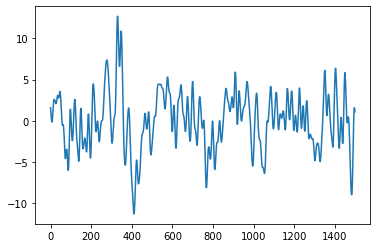

In [ ]:
plt.plot(xb[25][0].to('cpu').numpy())

In [ ]:
xb.shape

torch.Size([89, 173, 1500])

In [ ]:
net = StagerNet(173, embed_dim=1)

In [ ]:
net(xb.to('cpu'))

TSTensor(vars:89, len:1, device=cpu, dtype=torch.float32)

In [ ]:
learn = ts_learner(dls, net, loss_func=CustomLoss(), metrics=[mae, rmse], wd=0.05, cbs=ShowGraph())

SuggestedLRs(valley=5.248074739938602e-05)

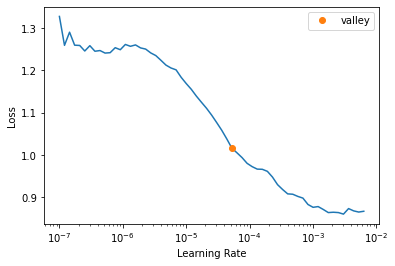

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,mae,_rmse,time
0,1.335700,2.026015,1.487038,1.601559,00:00
1,1.253563,1.620306,1.316288,1.387200,00:00
2,1.222349,1.485492,1.258669,1.308554,00:00
3,1.217683,1.667337,1.286582,1.431115,00:00
4,1.182587,1.407716,1.215789,1.264770,00:00
5,1.187551,1.575417,1.312858,1.355720,00:00
6,1.188602,1.348244,1.177107,1.232632,00:00
7,1.146437,1.260941,1.115324,1.185984,00:00
8,1.126039,1.444867,1.223265,1.290918,00:00
9,1.096403,1.474271,1.205359,1.320297,00:00


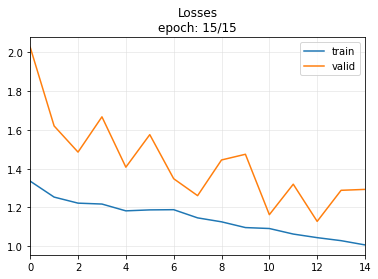

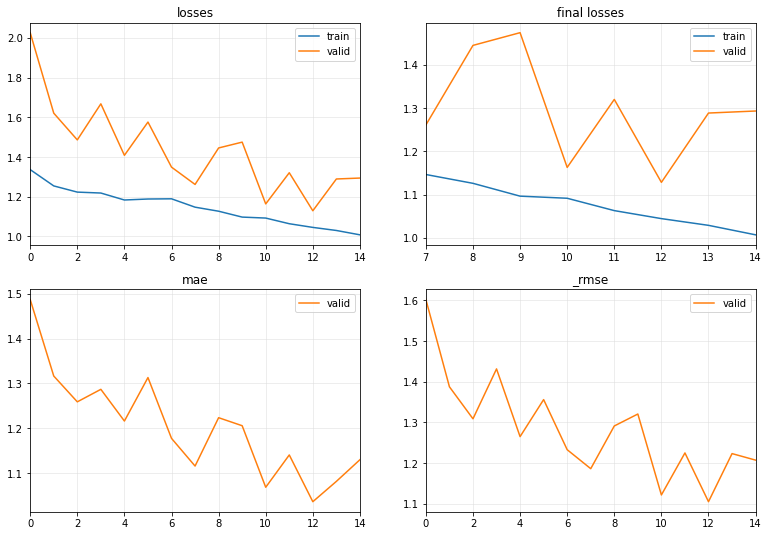

In [ ]:
learn.fit_one_cycle(15, 1e-5)

In [ ]:
ye_valid, y_valid = learn.get_preds()

In [ ]:
ye_valid

tensor([[ 0.4309],
        [ 0.1247],
        [-0.0552],
        [ 0.3877],
        [ 0.2811],
        [ 0.5449],
        [ 0.5925],
        [ 0.2351],
        [-1.4151],
        [ 0.2903],
        [ 0.5751],
        [-0.0276],
        [ 0.4873],
        [-0.1903],
        [ 0.0373],
        [ 0.7545],
        [ 0.3498],
        [ 0.0060],
        [ 0.1857],
        [ 0.6753],
        [ 1.3156],
        [ 0.4011],
        [ 0.4180]])

In [ ]:
y_valid

tensor([1.3000, 1.3000, 1.3000, 1.3000, 1.3000, 1.3000, 1.3000, 1.3000, 1.3000,
        1.3000, 1.3000, 1.3000, 1.3000, 1.3000, 1.3000, 1.3000, 1.3000, 1.3000,
        1.3000, 1.3000, 1.3000, 1.3000, 1.3000])